In [1]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

In [2]:
model = Model(starttime=1.0,stoptime=25.0,dt=1,name='DefenceSpendingModel')

In [3]:
# CONSTANTS
defence_spending_data = [
    (1,43.03), (2,43.03), (3,43.03), (4,43.03), 
    (5,43.68), (6,43.68), (7,43.68), (8,43.68),
    (9,44.33), (10,44.33), (11,44.33), (12,44.33),
    (13,45), (14,45), (15,45), (16,45),
    (17,45.67), (18,45.67), (19,45.67), (20,45.67),
    (21,46.36), (22,46.36), (23,46.36), (24,46.36)
]

In [4]:
order_backlog = model.stock("order_backlog")
order_backlog.initial_value = 42.4

In [5]:
# Define what is what
new_orders = model.flow('new_orders')
revenue = model.flow('revenue')

defence_spending = model.converter('defence_spending')
model.points['defence_spending'] = defence_spending_data

# todo: make it a converter with lookup table
# delivery_rate = model.converter('delivery_rate')

# new_orders.equation = 100
# revenue.equation = 200

In [10]:
# Give values to variables
new_orders.equation = defence_spending * order_backlog
# 30% share
new_orders.equation = defence_spending * 0.3

## assume delivery rate is 3.45% #todo: change
revenue.equation = 0.0345 * order_backlog


In [11]:
order_backlog.equation = new_orders - revenue

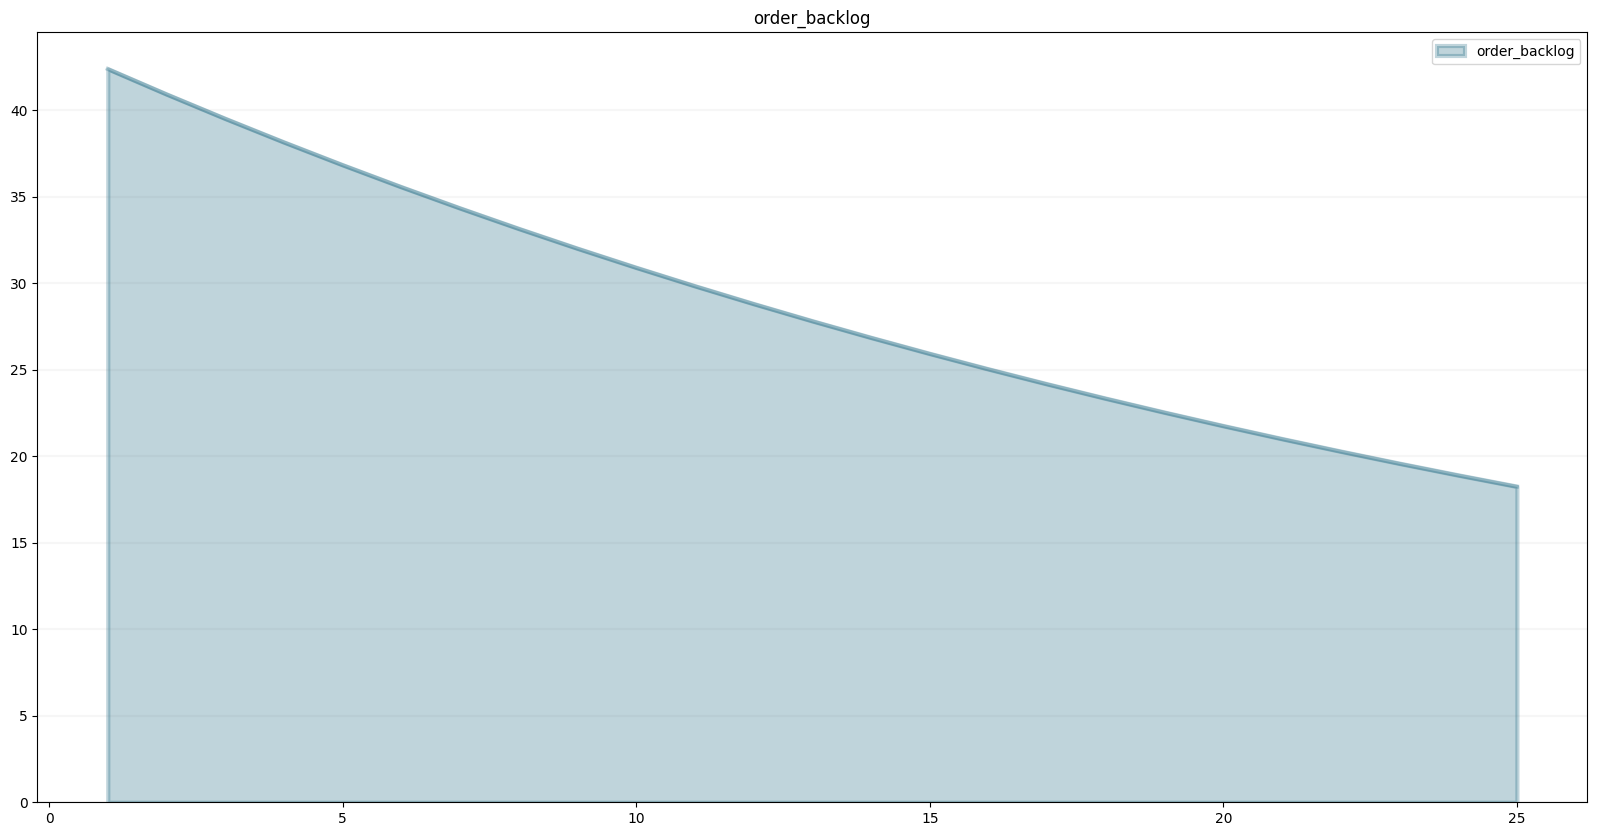

In [12]:
order_backlog.plot()